# Reading GERB HR files using Satpy

**Author:** Pierre de Buyl for the GERB project  

**Summary:** In this notebook, we show how to load and display data from GERB HR (High Resolution) files.

*While we hope to have the reader integrated soon into Satpy, please check the reader module from https://github.com/pdebuyl/satpy/tree/add_gerb_l2_hr_h5 in the meantime*

In [1]:
import satpy
import matplotlib.pyplot as plt

## Loading a GERB HR file

In [2]:
scene = satpy.Scene(reader="gerb_l2_hr_h5", filenames=["G1_SEV2_L20_HR_SOL_TH_20120621_101500_ED01.hdf"])

# The data fields must be loaded explicitly
scene.load(['Thermal Flux', 'Solar Flux'])

# For this example, we select a Region of Interest (ROI) using the "maspalomas" pre-defined region in Satpy
scene = scene.resample("maspalomas")

## Display using matplotlib

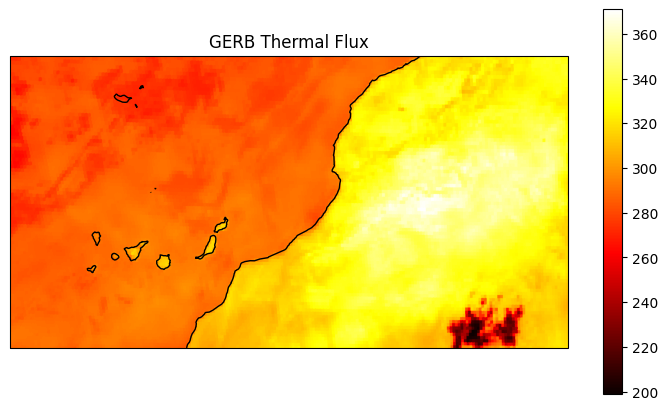

In [3]:
plt.figure(figsize=(9, 5))
crs = scene['Thermal Flux'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)
ax.coastlines()

plt.imshow(scene['Thermal Flux'], transform=crs, extent=crs.bounds, origin='upper', cmap=plt.cm.hot)

plt.title("GERB Thermal Flux")
plt.colorbar()

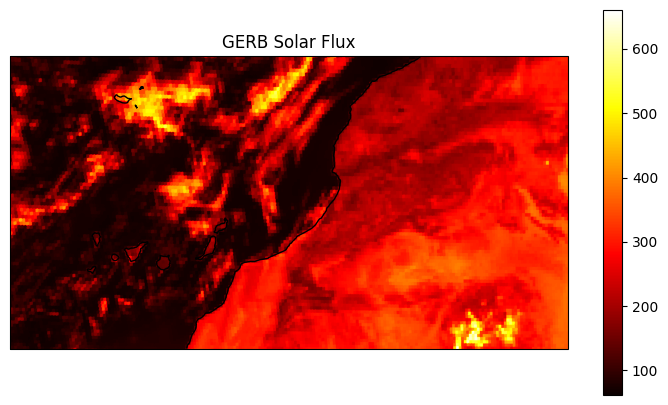

In [4]:
plt.figure(figsize=(9, 5))
crs = scene['Solar Flux'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)
ax.coastlines()

plt.imshow(scene['Solar Flux'], transform=crs, extent=crs.bounds, origin='upper', cmap=plt.cm.hot)

plt.title("GERB Solar Flux")
plt.colorbar()